<a href="https://colab.research.google.com/github/Jorge-89/Segmenta-clientes-con-K-means-mediante-Python-y-SKlearn./blob/main/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentación o clasificación de clientes :

Problema inicial:
Una compañia  desea segmentar a sus clientes en categorías mediante ciertas caracteristicas conocidas. 

Dentro de ML, se encuentra los algoritmos no supervisados que permiten hacer grupos en los datos (clusters) teniendo en cuenta ciertas caracteristicas y agrupandolos según lo similar que sean sus caracteristicas. 

En marketing este tipo de modelos son una poderosa herramienta ya que permite realizar campañas focalizadas a un grupo de clientes e inclusive tomar multiples decisiones, como tratar de llevar personas de un cluster a otro donde sea más rentable para el negocio

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [31]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Segmenta-clientes-con-K-means-mediante-Python-y-SKlearn./main/Mall_Customers.csv'
df = pd.read_csv(url, sep=",")
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.drop(columns=["CustomerID", "Spending Score (1-100)"], inplace=True)
df.head()


,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


In [24]:
len(df)

200

In [33]:
dummies=pd.get_dummies(df['Gender'])
dummies.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [26]:
len(dummies)

200

In [34]:
df_final=pd.concat([df, dummies["Male"]], axis=1)
df_final.drop(columns=["Gender"], inplace=True)
df_final.rename(columns = {'Male':'Gender'}, inplace = True)
df_final.head()

,Age,Annual Income (k$),Gender
0,19,15,1
1,21,15,1
2,20,16,0
3,23,16,0
4,31,17,0


In [45]:
km = KMeans(n_clusters=3, n_init=100, max_iter=1000, init='random')
preds = km.fit_predict(df_final)

In [46]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

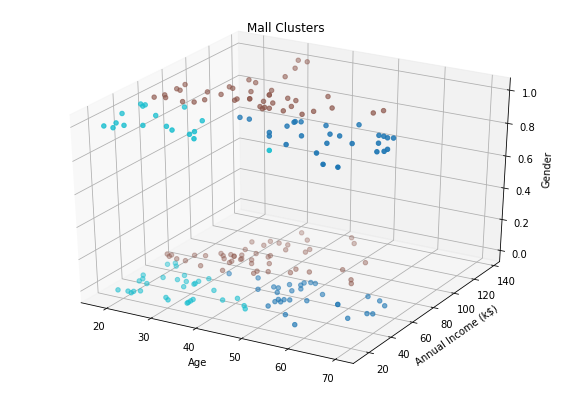

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(df_final["Age"], df_final["Annual Income (k$)"], df_final["Gender"], c=preds, cmap="tab10")
plt.title("Mall Clusters")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Gender")
plt.show()